# Initializing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')
train_data['train_test'] = 1
test_data['train_test'] = 0
test_data['Survived'] = np.NaN

all_data = pd.concat([test_data, train_data])
all_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test', 'Survived'],
      dtype='object')

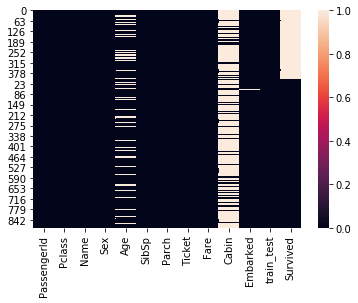

In [3]:
sns.heatmap(all_data.isna())

## To-Do's

- Understand Data
    - Understand Distributions and Correlations
- Understand Missing Data
- Explore Interesting Themes
- Feature Engineering
- Preprocessing or Transformer
- Scaling
- Model Baseline
- Model Comparison w/ CV

# Data Exploration

In [4]:
columns = []

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  train_test  
count  891.000000  891.000000       891.0  
mean     0.381594   32.204208         1.0  
std      0.806057   49.693429         0.0  
min      0.000000    0.000000         1.0  
25%      0.000000    7.910400         1.0  
50%      0.000000   14.454200         1.0  
75%      0.000000   31.000000         1.0  
max      6.000000  512.329200         1.0

In [7]:
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']
num_data = train_data[num_cols]
cat_data = train_data[cat_cols]

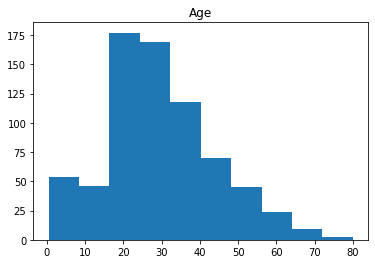

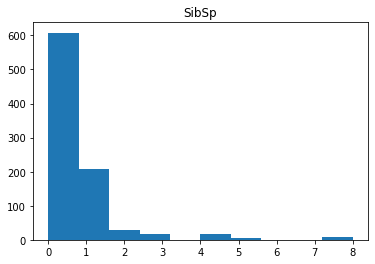

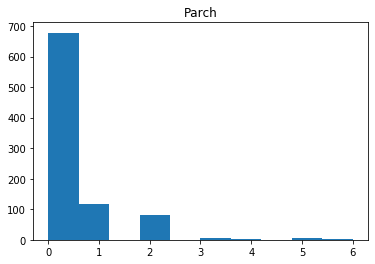

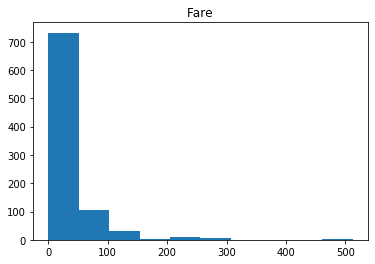

In [8]:
for i in num_data.columns:
    plt.hist(num_data[i])
    plt.title(i)
    plt.show()

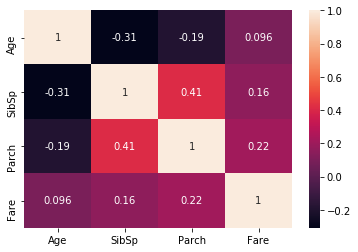

In [9]:
sns.heatmap(num_data.corr(), annot=True)

In [10]:
pd.pivot_table(train_data, index='Survived', values=num_cols)

Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684

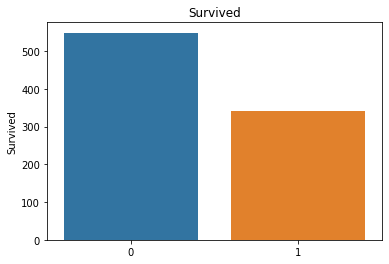

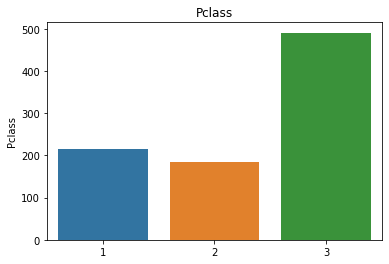

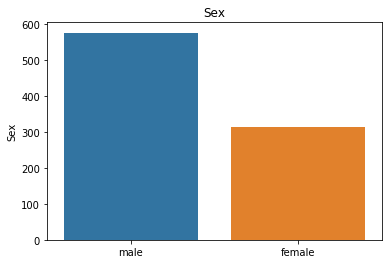

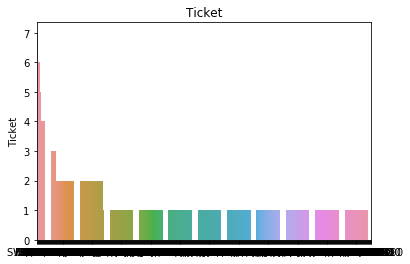

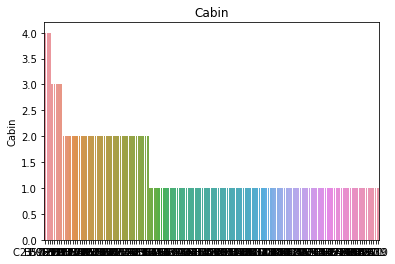

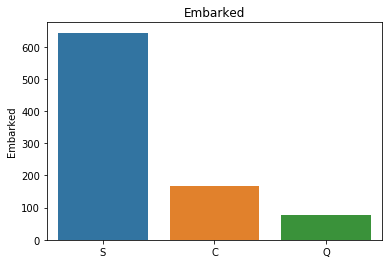

In [11]:
for i in cat_cols:
    sns.barplot(
        cat_data[i].value_counts().index,
        cat_data[i].value_counts()
    ).set_title(i)
    plt.show()

In [12]:
for i in ['Pclass', 'Sex', 'Embarked']:
    print(pd.pivot_table(
        cat_data,
        index='Survived',
        columns=[i],
        values='Ticket',
        aggfunc='count'
    ))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [13]:
all_data.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
B96 B98            4
C22 C26            4
                  ..
C30                1
C53                1
D43                1
E12                1
B36                1
Name: Cabin, Length: 186, dtype: int64

In [14]:
train_data['Cabin_Multiple'] = train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [15]:
train_data.Cabin_Multiple.value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_Multiple, dtype: int64

In [16]:
pd.pivot_table(
    train_data,
    index='Survived',
    columns='Cabin_Multiple',
    values='Ticket',
    aggfunc='count'
)

Cabin_Multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0

In [17]:
train_data['cabin_adv'] = train_data.Cabin.apply(lambda x: str(x)[0])

In [18]:
train_data.cabin_adv.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [19]:
pd.pivot_table(
    train_data,
    index='Survived',
    columns='cabin_adv',
    values='Name',
    aggfunc='count'
)

cabin_adv    A     B     C     D     E    F    G    T      n
Survived                                                    
0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1          7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0

In [20]:
train_data['numeric_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_data['ticket_letters'] = train_data.Ticket.apply(
    lambda x:
        ''.join(x.split(' ')[:-1])
            .replace('.', '')
            .replace('/', '')
            .lower()
        if len(x.split(' ')[:-1]) > 0 
        else 0
)

In [21]:
train_data.numeric_ticket.value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [22]:
pd.pivot_table(
    train_data,
    index='Survived',
    columns='ticket_letters',
    values='Ticket',
    aggfunc='count'
)

ticket_letters      0   a4    a5   as    c    ca  casoton   fa   fc  fcc  ...  \
Survived                                                                  ...   
0               410.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  1.0  ...   
1               255.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  NaN  4.0  ...   

ticket_letters  soc  sop  sopp  sotono2  sotonoq   sp  stono2  swpp   wc  wep  
Survived                                                                       
0               5.0  1.0   3.0      2.0     13.0  1.0    10.0   NaN  9.0  2.0  
1               1.0  NaN   NaN      NaN      2.0  NaN     8.0   2.0  1.0  1.0  

[2 rows x 29 columns]

In [23]:
train_data.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [24]:
train_data['name_title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [25]:
train_data[train_data.Embarked.isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  train_test  \
61   female  38.0      0      0  113572  80.0   B28      NaN           1   
829  female  62.0      0      0  113572  80.0   B28      NaN           1   

     Cabin_Multiple cabin_adv  numeric_ticket ticket_letters name_title  
61                1         B               1              0       Miss  
829               1         B               1              0        Mrs

In [26]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'Cabin_Multiple', 'cabin_adv', 'numeric_ticket', 'ticket_letters',
       'name_title'],
      dtype='object')

(889,)

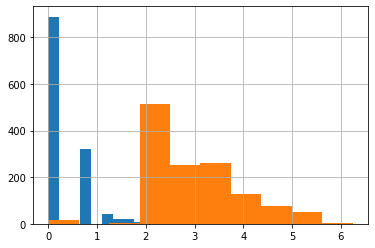

In [67]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(train_data.Age.mean())
all_data.Age = all_data.Age.fillna(train_data.Age.median())
#all_data.Fare = all_data.Fare.fillna(train_data.Fare.mean())
all_data.Fare = all_data.Fare.fillna(train_data.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

In [28]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [30]:
# #I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [43]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train_A, y_train_A)
y_pred = lr.predict(X_test_A)

def print_confusion_matrix(y_test, y_pred):
    print('Confusion Matrix:')
    matrix = confusion_matrix(y_test, y_pred)
    print(matrix)
    print('Accuracy: {:0.2f}%'.format((matrix[0][0] + matrix[1][1]) * 100 / matrix.sum()))
    print('Recall: {:0.2f}%'.format(matrix[0][0] * 100 / (matrix[0][0] + matrix[1][0])))
    print('Precision: {:0.2f}%'.format(matrix[0][0] * 100 / (matrix[0][0] + matrix[0][1])))

print_confusion_matrix(y_test_A, y_pred)

# Logistic Regression Coefficients
print('Feature Coefficients:')
for i in range(len(X_train_A.columns)):
    print('\t' + X_train_A.columns[i] + ': {:0.6f}'.format(lr.coef_[0][i]))

Confusion Matrix:
[[117  24]
 [ 19  63]]
Accuracy: 80.72%
Recall: 86.03%
Precision: 82.98%
Feature Coefficients:
	Age: -0.036681
	SibSp: -0.773763
	Parch: -0.424165
	norm_fare: 0.558333
	cabin_multiple: 0.283913
	numeric_ticket: 0.158963
	Pclass_2: 0.199402
	Pclass_3: -0.688758
	Sex_male: -1.140626
	Embarked_Q: -0.183109
	Embarked_S: -0.478117
	cabin_adv_B: 0.057576
	cabin_adv_C: -0.196582
	cabin_adv_D: 0.867236
	cabin_adv_E: 0.863342
	cabin_adv_F: -0.251691
	cabin_adv_G: 0.158860
	cabin_adv_T: -0.256424
	cabin_adv_n: -0.422278
	name_title_Col: 0.232854
	name_title_Don: 0.000000
	name_title_Dona: 0.000000
	name_title_Dr: 0.182108
	name_title_Jonkheer: -0.154948
	name_title_Lady: 0.141866
	name_title_Major: -0.191231
	name_title_Master: 1.229787
	name_title_Miss: 0.006891
	name_title_Mlle: 0.067988
	name_title_Mme: 0.000000
	name_title_Mr: -1.706481
	name_title_Mrs: 0.823291
	name_title_Ms: 0.000000
	name_title_Rev: -0.973887
	name_title_Sir: 0.300697
	name_title_the Countess: 0.045891


In [32]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [33]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [34]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [35]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.79775281 0.80898876 0.82022472 0.85310734]
0.8099473116231829


In [36]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


In [37]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [38]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.79213483 0.84831461 0.73595506 0.82485876]
0.8009268075922046


In [39]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.81460674 0.85393258 0.79775281 0.81355932]
0.8200152351932963


In [41]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83146067 0.81460674 0.8258427  0.79775281 0.84745763]
0.8234241096933917


In [42]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

In [44]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 177 out of 200 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.8s finished
